## IMPORTING DATA AND PREPROCESSING

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from plotly.subplots import make_subplots
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from hyperopt import hp, tpe, Trials, fmin
from scipy.stats import randint
import joblib

In [2]:
# Establish a connection to your MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Oluwaseyi2000",
    database="hyandai"
)


In [3]:
# Create a cursor object
cursor = conn.cursor()

In [4]:
# Execute your SQL query
query = """
SELECT Date, Open, High, Low, Close, `Adj Close`, Volume
FROM hyandai_full
ORDER BY Date
"""
cursor.execute(query)


In [5]:
# Fetch all rows from the result
data = cursor.fetchall()


In [6]:
# Get column names
columns = [i[0] for i in cursor.description]


In [7]:
# Close the cursor and connection
cursor.close()
conn.close()

In [8]:
# Create a pandas DataFrame
df = pd.DataFrame(data, columns=columns)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,110863.765625,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,110478.820312,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,107784.226562,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,105859.507812,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,105089.617188,888701
...,...,...,...,...,...,...
2024-07-02,283000.0,283500.0,271000.0,272500.0,272500.000000,1558999
2024-07-03,275000.0,281500.0,272500.0,276000.0,276000.000000,1072157
2024-07-04,277500.0,281000.0,274500.0,277500.0,277500.000000,552767


In [10]:
# Display descriptive statistics
print(df.describe())


                Open           High            Low          Close  \
count    2089.000000    2089.000000    2089.000000    2089.000000   
mean   164867.065582  167034.561991  162807.276209  164880.852082   
std     40822.954663   41441.424898   40263.019416   40766.964443   
min     67200.000000   71000.000000   65000.000000   65900.000000   
25%    134000.000000  135500.000000  132000.000000  133500.000000   
50%    157000.000000  160000.000000  155000.000000  157500.000000   
75%    190000.000000  192400.000000  188100.000000  190000.000000   
max    299500.000000  299500.000000  293000.000000  298000.000000   

           Adj Close        Volume  
count    2089.000000  2.089000e+03  
mean   143750.432103  8.587053e+05  
std     43861.082237  9.512415e+05  
min     57159.664062  0.000000e+00  
25%    107399.265625  4.236160e+05  
50%    127103.601562  5.945770e+05  
75%    177718.328125  9.344630e+05  
max    298000.000000  1.993370e+07  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2089 entries, 2016-01-04 to 2024-07-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2089 non-null   float64
 1   High       2089 non-null   float64
 2   Low        2089 non-null   float64
 3   Close      2089 non-null   float64
 4   Adj Close  2089 non-null   float64
 5   Volume     2089 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.2 KB


In [12]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
df2 = df.copy()
df3 = df.copy()

## EDA

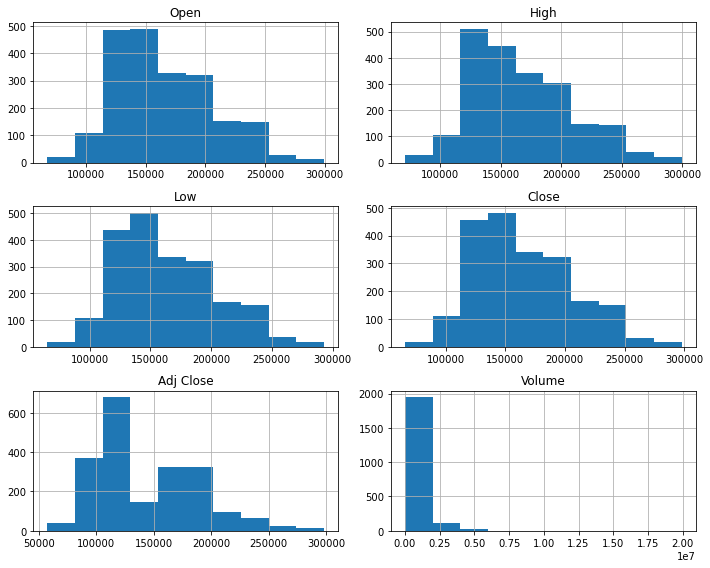

In [15]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

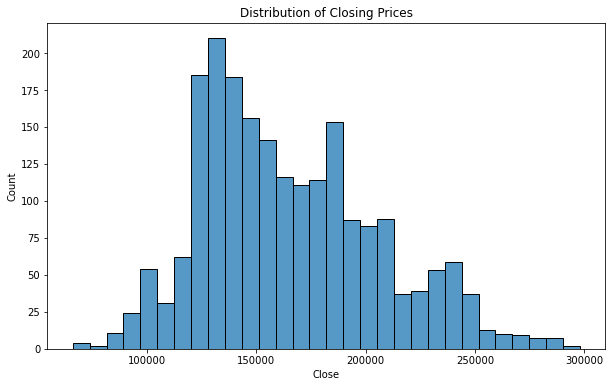

In [16]:
# Visualize the distribution of the data
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30)
plt.title('Distribution of Closing Prices')
plt.show()


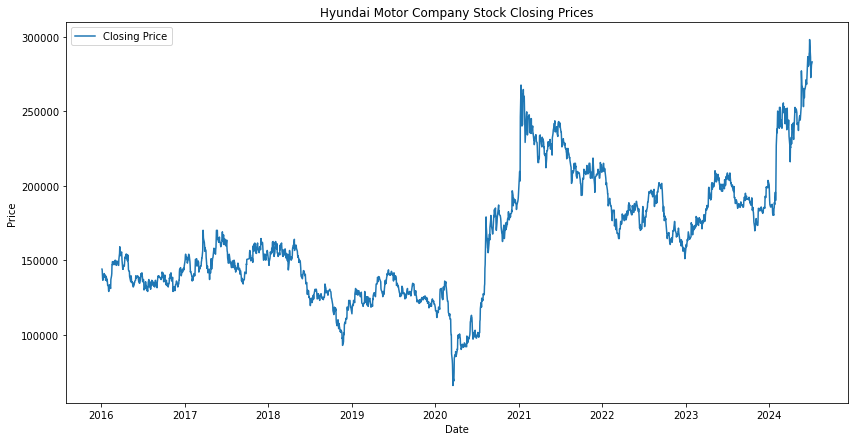

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Hyundai Motor Company Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


<Figure size 864x576 with 0 Axes>

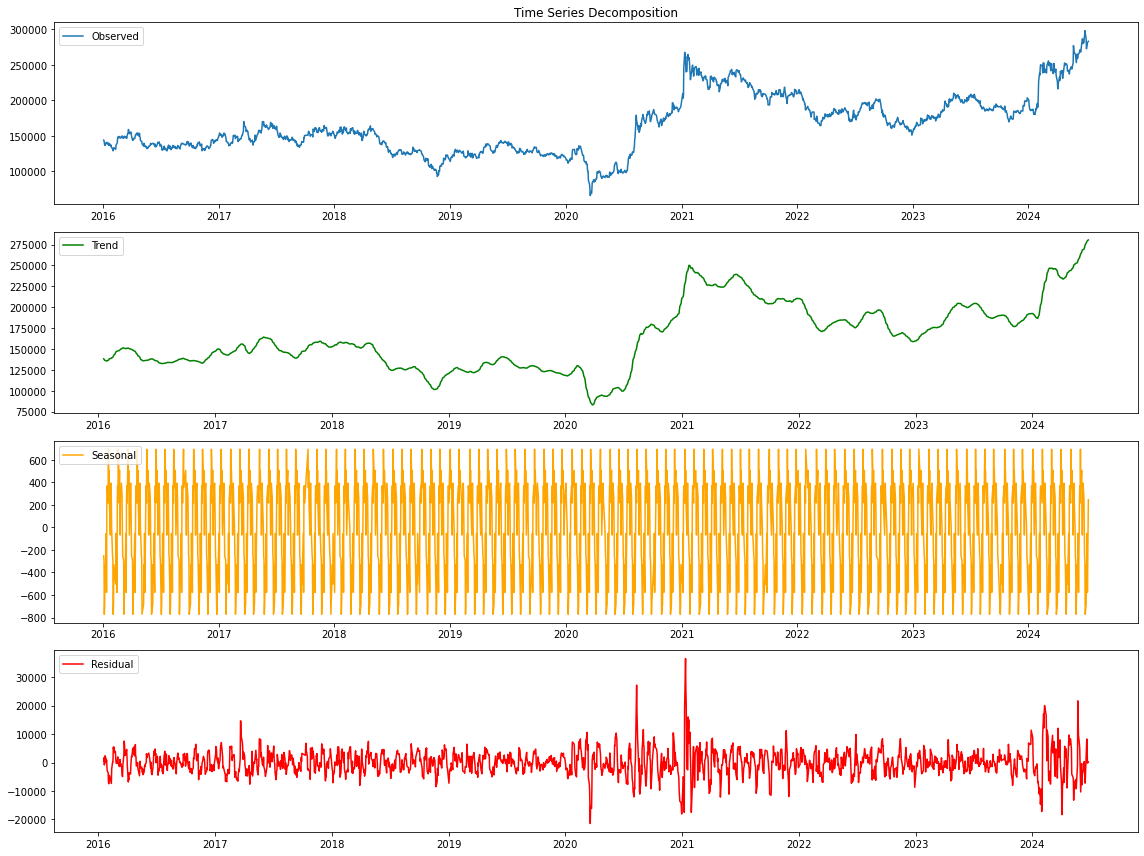

In [18]:

# Time series decomposition
result = seasonal_decompose(df['Close'], model='additive', period=20)

# Adjust the figure size and layout
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)


# Adjust the figure size and layout
fig, axes = plt.subplots(4, 1, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)

# Plot the decomposed components
axes[0].plot(result.observed, label='Observed')
axes[0].set_title('Time Series Decomposition')
axes[0].legend(loc='upper left')

axes[1].plot(result.trend, color='green', label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(result.seasonal, color='orange', label='Seasonal')
axes[2].legend(loc='upper left')

axes[3].plot(result.resid, color='red', label='Residual')
axes[3].legend(loc='upper left')

# Adjust the spacing and labels
plt.tight_layout()
plt.show()

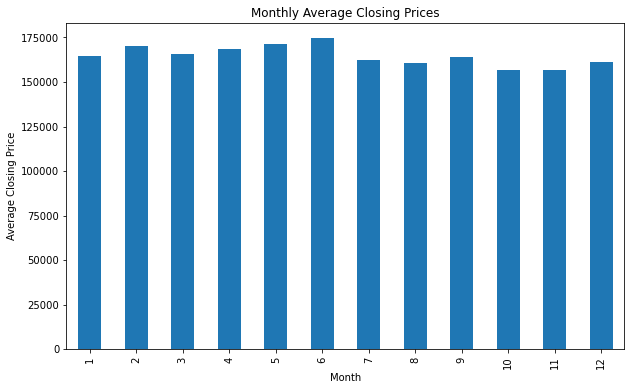

In [19]:
# Plot monthly seasonality
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.title('Monthly Average Closing Prices')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()


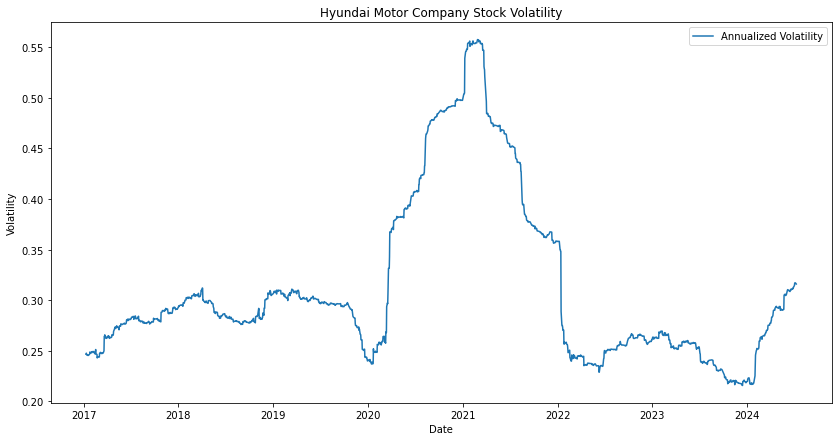

In [20]:
# Calculate daily returns and volatility
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=252).std() * (252**0.5)  # Annualized volatility

# Plot volatility
plt.figure(figsize=(14, 7))
plt.plot(df['Volatility'], label='Annualized Volatility')
plt.title('Hyundai Motor Company Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


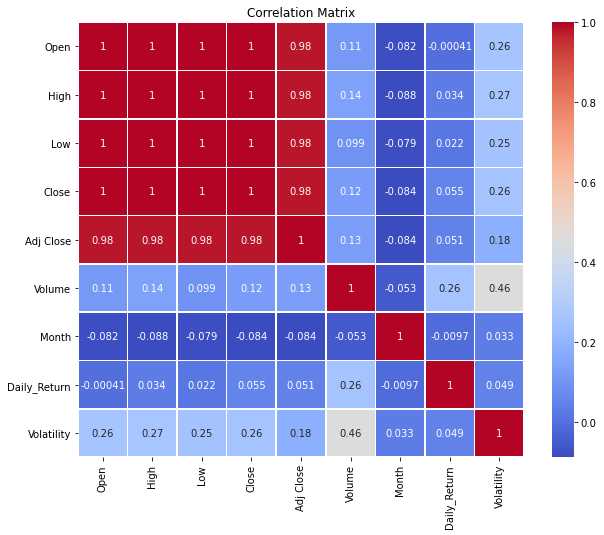

In [21]:
# Display and plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Time Series Analysis and Forecasting for Hyundai Stock Prices

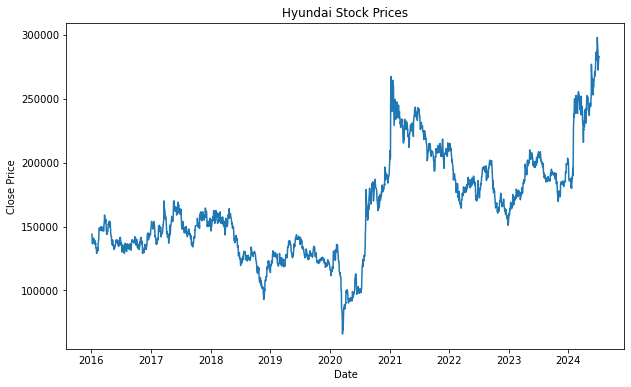

ADF Statistic: -0.7526774321769056
p-value: 0.8326292027941706
Critial Values:
   1%, -3.4335206767270354
Critial Values:
   5%, -2.862940658476002
Critial Values:
   10%, -2.5675156466298095


In [22]:

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Hyundai Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Perform ADF test
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


### the data is not sationary 

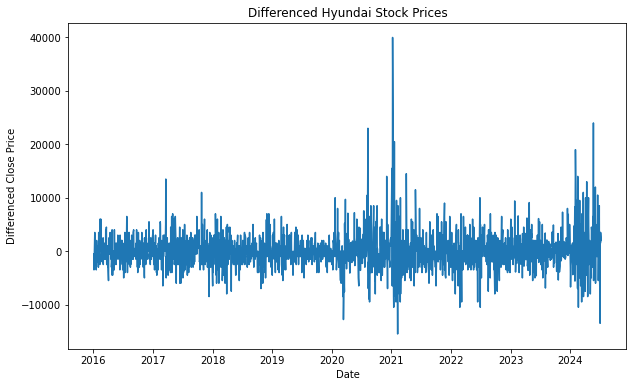

ADF Statistic (differenced): -9.748651366906337
p-value (differenced): 8.12673733513085e-17
Critical Values (differenced):
   1%, -3.4335206767270354
Critical Values (differenced):
   5%, -2.862940658476002
Critical Values (differenced):
   10%, -2.5675156466298095


In [23]:
# Differencing to achieve stationarity
df['Close_diff'] = df['Close'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'])
plt.title('Differenced Hyundai Stock Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

# Perform ADF test on the differenced series
result_diff = adfuller(df['Close_diff'].dropna())
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values (differenced):')
    print(f'   {key}, {value}')


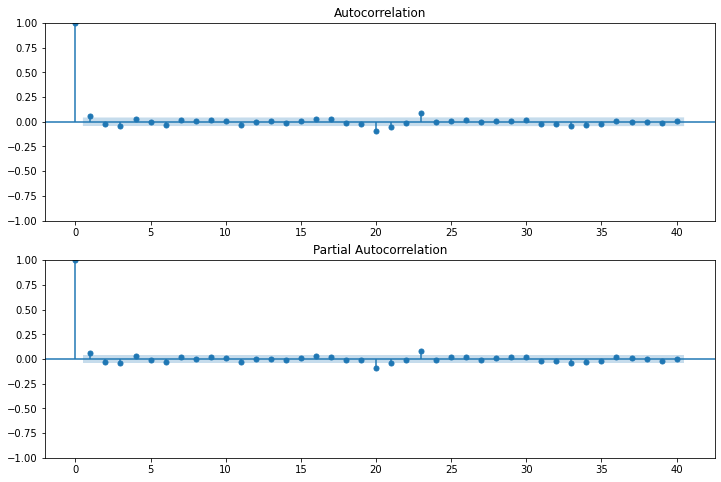

In [24]:
# Plot ACF and PACF for the differenced series
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Close_diff'].dropna(), lags=40, ax=ax[0])
plot_pacf(df['Close_diff'].dropna(), lags=40, ax=ax[1])
plt.show()


In [25]:


# Fit the model using pmdarima's auto_arima
auto_model = pm.auto_arima(df['Close'], seasonal=False, stepwise=True, trace=True)

# Print the summary of the auto_arima model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39866.372, Time=2.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39868.665, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39867.179, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39866.981, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39867.472, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39867.070, Time=1.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39866.719, Time=1.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=39866.855, Time=1.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=39866.723, Time=2.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39868.309, Time=1.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=39865.791, Time=1.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=39864.007, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=39866.728, Time=0.33 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=39865.631, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0

In [26]:

# Extract the optimal order from auto_arima
order = auto_model.order
print('Optimal order:', order)

# Fit the ARIMA model
model = ARIMA(df['Close'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


Optimal order: (0, 1, 3)


C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2089
Model:                 ARIMA(0, 1, 3)   Log Likelihood              -19927.457
Date:                Wed, 31 Jul 2024   AIC                          39862.914
Time:                        09:41:42   BIC                          39885.490
Sample:                             0   HQIC                         39871.186
                               - 2089                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0326      0.010      3.292      0.001       0.013       0.052
ma.L2         -0.0238      0.015     -1.638      0.102      -0.052       0.005
ma.L3         -0.0365      0.016     -2.238      0.0

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


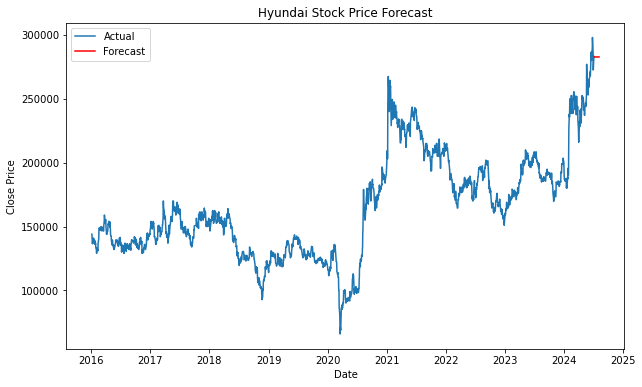

In [27]:
# Forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Hyundai Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


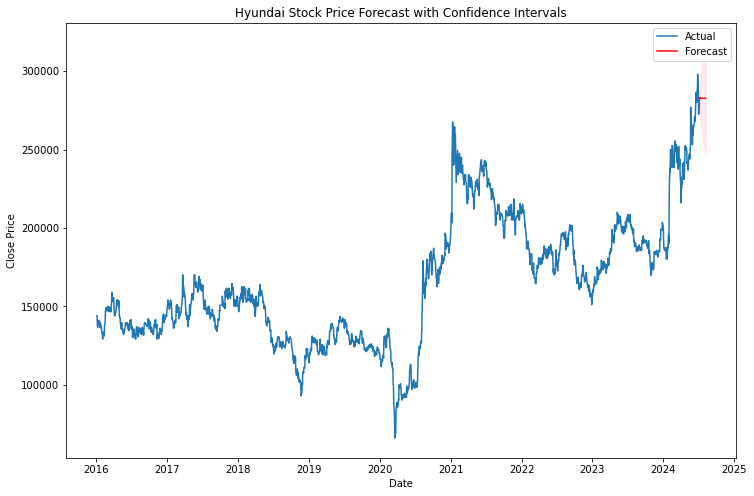

            Forecast  Lower CI  Upper CI
2024-07-09       NaN       NaN       NaN
2024-07-10       NaN       NaN       NaN
2024-07-11       NaN       NaN       NaN
2024-07-12       NaN       NaN       NaN
2024-07-13       NaN       NaN       NaN
2024-07-14       NaN       NaN       NaN
2024-07-15       NaN       NaN       NaN
2024-07-16       NaN       NaN       NaN
2024-07-17       NaN       NaN       NaN
2024-07-18       NaN       NaN       NaN
2024-07-19       NaN       NaN       NaN
2024-07-20       NaN       NaN       NaN
2024-07-21       NaN       NaN       NaN
2024-07-22       NaN       NaN       NaN
2024-07-23       NaN       NaN       NaN
2024-07-24       NaN       NaN       NaN
2024-07-25       NaN       NaN       NaN
2024-07-26       NaN       NaN       NaN
2024-07-27       NaN       NaN       NaN
2024-07-28       NaN       NaN       NaN
2024-07-29       NaN       NaN       NaN
2024-07-30       NaN       NaN       NaN
2024-07-31       NaN       NaN       NaN
2024-08-01      

In [28]:
# Forecasting with confidence intervals
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

# Create a date index for the forecast period
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')

# Plot the actual and forecasted values with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Hyundai Stock Price Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print the forecasted values with confidence intervals
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': confidence_intervals.iloc[:, 0],
    'Upper CI': confidence_intervals.iloc[:, 1]
}, index=forecast_index)

print(forecast_df)


Forecast: 2089    282965.870280
2090    282804.480963
2091    282729.680509
2092    282729.680509
2093    282729.680509
2094    282729.680509
2095    282729.680509
2096    282729.680509
2097    282729.680509
2098    282729.680509
2099    282729.680509
2100    282729.680509
2101    282729.680509
2102    282729.680509
2103    282729.680509
2104    282729.680509
2105    282729.680509
2106    282729.680509
2107    282729.680509
2108    282729.680509
2109    282729.680509
2110    282729.680509
2111    282729.680509
2112    282729.680509
2113    282729.680509
2114    282729.680509
2115    282729.680509
2116    282729.680509
2117    282729.680509
2118    282729.680509
Name: predicted_mean, dtype: float64
Confidence Intervals:         lower Close    upper Close
2089  276339.426711  289592.313849
2090  273279.123769  292329.838157
2091  271092.433240  294366.927777
2092  269427.701651  296031.659366
2093  267949.296243  297510.064775
2094  266605.882055  298853.478963
2095  265366.098098  30009

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


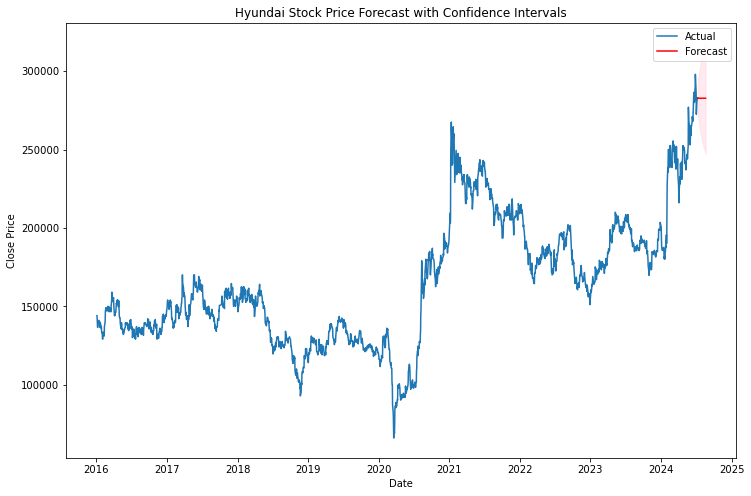

In [29]:
# Check forecast result
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

# Debugging: print the forecast results and confidence intervals
print(f"Forecast: {forecast}")
print(f"Confidence Intervals: {confidence_intervals}")

# Ensure the forecast index is correctly aligned
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Debugging: print the forecast index
print(f"Forecast Index: {forecast_index}")

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': confidence_intervals.iloc[:, 0],
    'Upper CI': confidence_intervals.iloc[:, 1]
}, index=forecast_index)

# Debugging: print the forecast DataFrame
print(forecast_df)

# Plot the actual and forecasted values with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Hyundai Stock Price Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                 Forecast       Lower CI       Upper CI
2024-07-09  282965.870280  276339.426711  289592.313849
2024-07-10  282804.480963  273279.123769  292329.838157
2024-07-11  282729.680509  271092.433240  294366.927777
2024-07-12  282729.680509  269427.701651  296031.659366
2024-07-15  282729.680509  267949.296243  297510.064775
2024-07-16  282729.680509  266605.882055  298853.478963
2024-07-17  282729.680509  265366.098098  300093.262919
2024-07-18  282729.680509  264209.121347  301250.239670
2024-07-19  282729.680509  263120.289157  302339.071860
2024-07-22  282729.680509  262088.814569  303370.546448
2024-07-23  282729.680509  261106.487769  304352.873248
2024-07-24  282729.680509  260166.888532  305292.472486
2024-07-25  282729.680509  259264.883486  306194.477532
2024-07-26  282729.680509  258396.291578  307063.069439
2024-07-29  282729.680509  257557.653685  307901.707332
2024-07-30  282729.680509  256746.069291  308713.291727
2024-07-31  282729.680509  255959.077799  309500

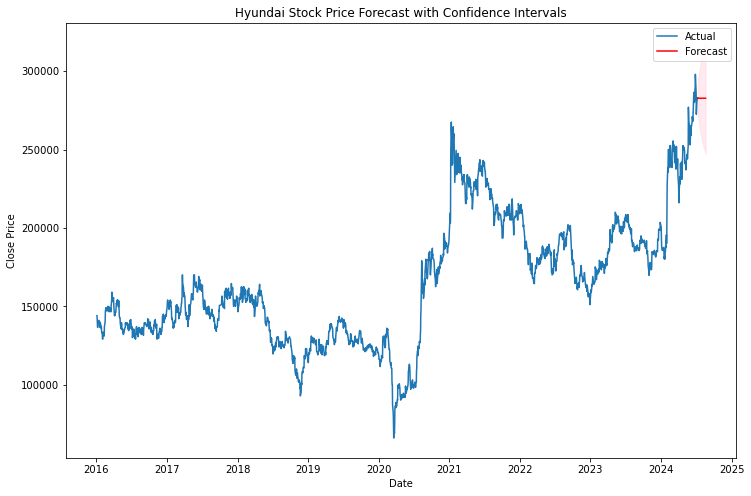

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Forecasting with confidence intervals
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

# Create a date index for the forecast period
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Create a DataFrame for the forecast using the forecast_index
forecast_df = pd.DataFrame({
    'Forecast': forecast.values,
    'Lower CI': confidence_intervals.iloc[:, 0].values,
    'Upper CI': confidence_intervals.iloc[:, 1].values
}, index=forecast_index)

# Debugging: print the forecast DataFrame
print(forecast_df)

# Plot the actual and forecasted values with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Hyundai Stock Price Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [31]:
print(forecast_df.head())


                 Forecast       Lower CI       Upper CI
2024-07-09  282965.870280  276339.426711  289592.313849
2024-07-10  282804.480963  273279.123769  292329.838157
2024-07-11  282729.680509  271092.433240  294366.927777
2024-07-12  282729.680509  269427.701651  296031.659366
2024-07-15  282729.680509  267949.296243  297510.064775


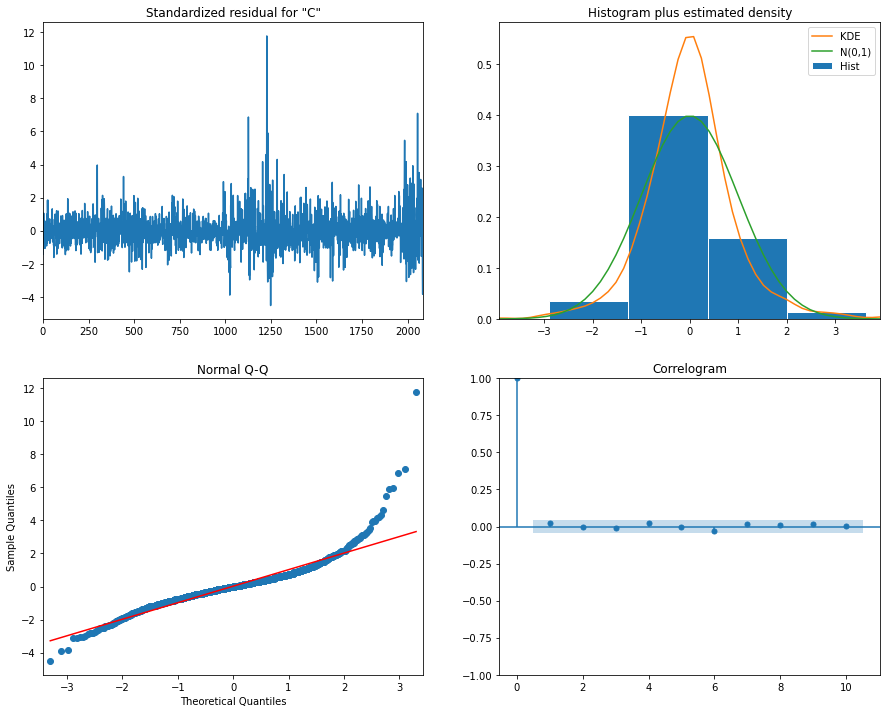

In [32]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


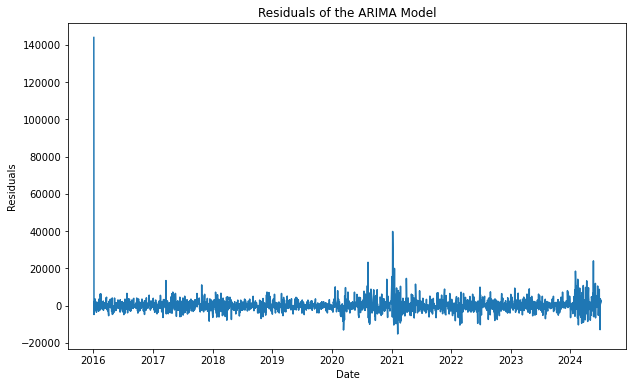

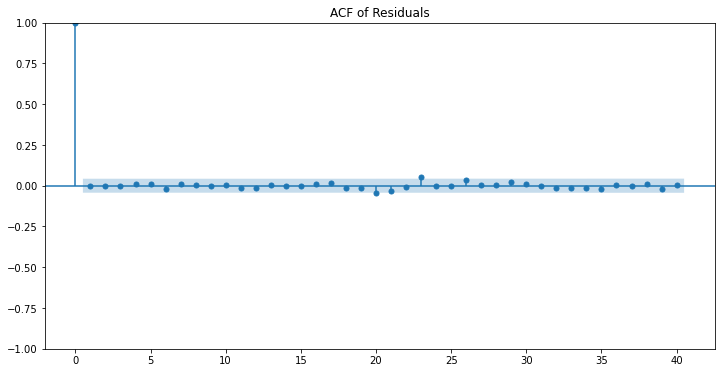

In [33]:
# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot ACF of residuals
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plot_acf(residuals, lags=40, ax=ax)
plt.title('ACF of Residuals')
plt.show()


## Hyundai Stock Price Prediction Using Linear Regression and Random Forest

In [34]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,110863.765625,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,110478.820312,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,107784.226562,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,105859.507812,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,105089.617188,888701
...,...,...,...,...,...,...
2024-07-02,283000.0,283500.0,271000.0,272500.0,272500.000000,1558999
2024-07-03,275000.0,281500.0,272500.0,276000.0,276000.000000,1072157
2024-07-04,277500.0,281000.0,274500.0,277500.0,277500.000000,552767


In [35]:
# Define the features (X) and the target (y)
X = df2.drop('Close', axis=1)  # Assuming 'Close' is the column with stock prices
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression Mean Squared Error: 1929036.0441290652
Linear Regression R^2 Score: 0.9988581061075141


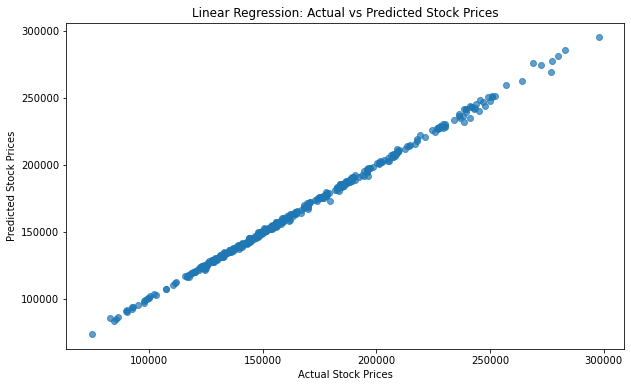

In [36]:
# Initialize and fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_regressor.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.title('Linear Regression: Actual vs Predicted Stock Prices')
plt.show()


Random Forest Regression Mean Squared Error: 1873116.490430622
Random Forest Regression R^2 Score: 0.9988912077164929


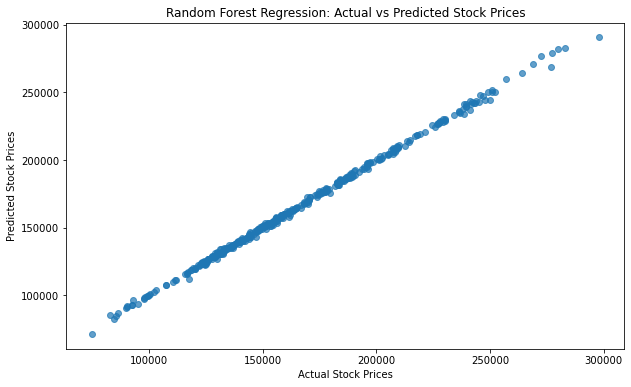

In [37]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest Regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression R^2 Score: {r2_rf}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.title('Random Forest Regression: Actual vs Predicted Stock Prices')
plt.show()


In [38]:
print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression R^2 Score: {r2_rf}')


Linear Regression Mean Squared Error: 1929036.0441290652
Linear Regression R^2 Score: 0.9988581061075141
Random Forest Regression Mean Squared Error: 1873116.490430622
Random Forest Regression R^2 Score: 0.9988912077164929


### Fine-Tuning the Random Forest Model

In [39]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random samples
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

print(f'Best parameters found: {best_params}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}


### Update Parameters

In [40]:

# Update the best parameters if necessary
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_features='sqrt',
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the best Random Forest model: {mse}')


Mean Squared Error of the best Random Forest model: 2393923.7326555024


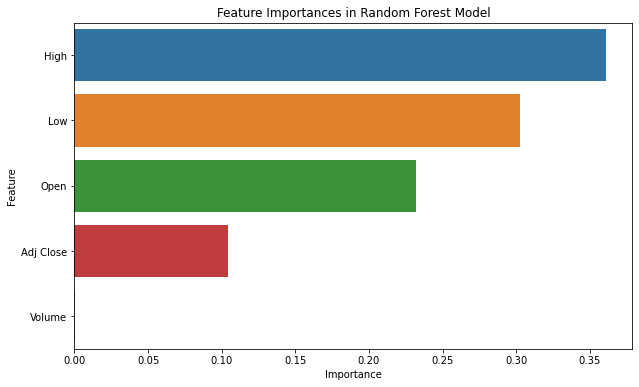

In [41]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()


### Hyperparameter Optimization of Random Forest Regressor using Hyperopt

In [42]:

def objective(params):
    rf = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_features=params['max_features'],
        max_depth=params['max_depth'] if params['max_depth'] is not None else None,
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        random_state=42
    )
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

# Define the search space
space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300, 400]),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4])
}

# Initialize Trials object to store search results
trials = Trials()

# Run Hyperopt optimization
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,  # Number of evaluations
            trials=trials,
            rstate=np.random.default_rng(seed=42))

print(f'Best parameters found: {best}')


  4%|█▉                                               | 2/50 [00:02<00:56,  1.19s/trial, best loss: 2558084.7610153616]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



  6%|███                                               | 3/50 [00:02<00:48,  1.02s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



  8%|████                                              | 4/50 [00:05<01:17,  1.69s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 10%|█████                                             | 5/50 [00:06<01:09,  1.54s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 20%|█████████▊                                       | 10/50 [00:11<00:42,  1.06s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 34%|████████████████▋                                | 17/50 [00:18<00:33,  1.01s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 40%|███████████████████▌                             | 20/50 [00:23<00:36,  1.20s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 42%|████████████████████▌                            | 21/50 [00:24<00:29,  1.03s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 44%|█████████████████████▌                           | 22/50 [00:25<00:32,  1.15s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 46%|██████████████████████▌                          | 23/50 [00:26<00:28,  1.07s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 48%|███████████████████████▌                         | 24/50 [00:27<00:24,  1.04trial/s, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 50%|████████████████████████▌                        | 25/50 [00:28<00:25,  1.02s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 52%|█████████████████████████▍                       | 26/50 [00:29<00:25,  1.08s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 54%|██████████████████████████▍                      | 27/50 [00:30<00:22,  1.01trial/s, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 56%|███████████████████████████▍                     | 28/50 [00:31<00:22,  1.04s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 58%|████████████████████████████▍                    | 29/50 [00:32<00:19,  1.08trial/s, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 62%|██████████████████████████████▍                  | 31/50 [00:33<00:15,  1.26trial/s, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 64%|███████████████████████████████▎                 | 32/50 [00:35<00:23,  1.28s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 68%|█████████████████████████████████▎               | 34/50 [00:37<00:16,  1.01s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 70%|██████████████████████████████████▎              | 35/50 [00:37<00:13,  1.13trial/s, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 72%|███████████████████████████████████▎             | 36/50 [00:40<00:19,  1.42s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 74%|████████████████████████████████████▎            | 37/50 [00:41<00:15,  1.17s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 78%|██████████████████████████████████████▏          | 39/50 [00:42<00:10,  1.02trial/s, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 80%|███████████████████████████████████████▏         | 40/50 [00:45<00:14,  1.41s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 82%|████████████████████████████████████████▏        | 41/50 [00:45<00:10,  1.16s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 86%|██████████████████████████████████████████▏      | 43/50 [00:48<00:07,  1.10s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 90%|████████████████████████████████████████████     | 45/50 [00:50<00:05,  1.04s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 94%|██████████████████████████████████████████████   | 47/50 [00:53<00:03,  1.28s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 96%|███████████████████████████████████████████████  | 48/50 [00:54<00:02,  1.33s/trial, best loss: 1873116.490430622]

C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



100%|█████████████████████████████████████████████████| 50/50 [00:56<00:00,  1.12s/trial, best loss: 1873116.490430622]
Best parameters found: {'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 0}


In [43]:
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [44]:

# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the search
random_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best score found: {random_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best score found: 0.9986232150829396


In [45]:
# Define the final model with the best parameters
best_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=30,
    random_state=42
)

# Train the model
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")


Mean Squared Error on the test set: 2393923.7326555024


In [46]:


# Convert the trials to a DataFrame
results = pd.DataFrame(trials.results)
print(f'Best hyperparameters found: {best}')
print(f'All trials: \n{results}')


Best hyperparameters found: {'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 0}
All trials: 
            loss status
0   3.108348e+06     ok
1   2.558085e+06     ok
2   1.873116e+06     ok
3   2.011459e+06     ok
4   2.017669e+06     ok
5   2.393075e+06     ok
6   3.030784e+06     ok
7   3.015480e+06     ok
8   3.220057e+06     ok
9   2.558085e+06     ok
10  1.942430e+06     ok
11  3.047707e+06     ok
12  2.526060e+06     ok
13  2.524932e+06     ok
14  2.412674e+06     ok
15  3.108348e+06     ok
16  3.101132e+06     ok
17  2.328003e+06     ok
18  2.572661e+06     ok
19  2.678113e+06     ok
20  1.873116e+06     ok
21  1.873116e+06     ok
22  1.873116e+06     ok
23  1.966136e+06     ok
24  1.873116e+06     ok
25  1.873116e+06     ok
26  1.873116e+06     ok
27  2.338365e+06     ok
28  1.873116e+06     ok
29  1.873116e+06     ok
30  2.465642e+06     ok
31  1.955492e+06     ok
32  2.289716e+06     ok
33  2.393924e+06     ok
34  1.873116e+06 

In [47]:
# Extract best hyperparameters
best_params = {
    'n_estimators': [100, 200, 300, 400][best['n_estimators']],
    'max_features': ['auto', 'sqrt', 'log2'][best['max_features']],
    'max_depth': [None, 10, 20, 30][best['max_depth']],
    'min_samples_split': [2, 5, 10][best['min_samples_split']],
    'min_samples_leaf': [1, 2, 4][best['min_samples_leaf']]
}

# Train the final model
final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
final_model.fit(X_train, y_train)


C:\Users\Osho Emmanuel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', random_state=42)

In [48]:

# Predictions on the test set
final_predictions = final_model.predict(X_test)

# Calculate the Mean Squared Error
final_mse = mean_squared_error(y_test, final_predictions)
print(f'Mean Squared Error of the final model: {final_mse}')


Mean Squared Error of the final model: 1873116.490430622


In [49]:

# Save the model
joblib.dump(final_model, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']